<a href="https://colab.research.google.com/github/RicStrong/Kings_County_Real_Estate/blob/master/KingsCountyRealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

King's County Real Estate Dataset


####Importing data, libraries, etc.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [271]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from sklearn.model_selection import train_test_split, KFold, cross_val_score


df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


####Dtypes and Nulls


In [229]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [230]:
df.isna().mean() * 100

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

####Looking for correlations

In [231]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


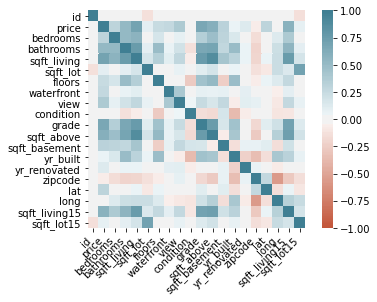

In [232]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

####Location Plotting

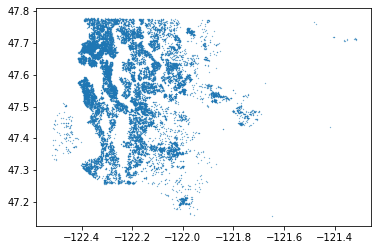

In [233]:
plt.plot(df['long'], df['lat'], '.', markersize=.5)

####Making a Linear Regression


In [234]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
X = df['yr_built'].values
X = X.reshape(21613, 1)
X.shape

(21613, 1)

In [236]:
y = df['price'].values
y = y.reshape(21613, 1)
y.shape

(21613, 1)

In [237]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.fit(X,y)
predictions = model.predict(X)

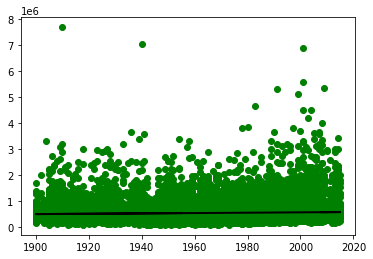

In [239]:
plt.scatter(X, y, color='green');
plt.plot(X, predictions, color='black',linewidth=2);

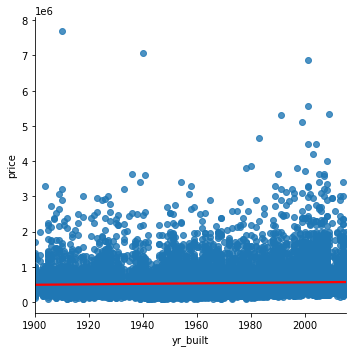

In [240]:
sns.lmplot(x='yr_built', y='price', data=df, ci=None, line_kws={'color': 'red'})

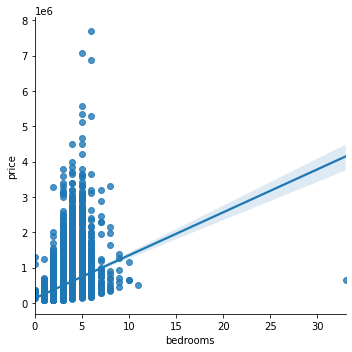

In [241]:
sns.lmplot(x='bedrooms', y='price', data=df)

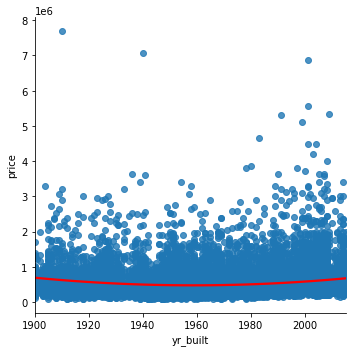

In [242]:
#polynomial regression
sns.lmplot(x='yr_built', y='price', data=df, ci=None, order=2, line_kws={'color': 'red'})


In [243]:
model.coef_

array([[675.06978569]])

In [244]:
model.intercept_

array([-790477.87285507])

In [245]:
m = model.coef_[0][0]

b = model.intercept_[0]

# following slope intercept form 
print("formula: y = {0}x + {1}".format(m, b) )

formula: y = 675.069785692344x + -790477.8728550678


####Logistic Regression (is a house on the waterfront?)

Text(0.5, 0, 'house price')

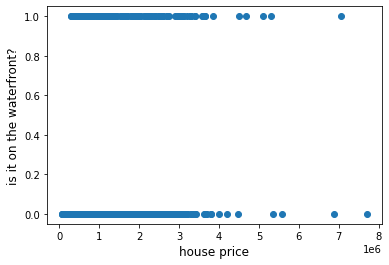

In [256]:
#already imported what I need 
plt.scatter(df['price'], df['waterfront'])
plt.ylabel('is it on the waterfront?', fontsize = 12)
plt.xlabel('house price', fontsize = 12)

In [0]:
X = df['price'].values.reshape(-1,1)
y = df['waterfront']

Text(0.5, 0, 'price')

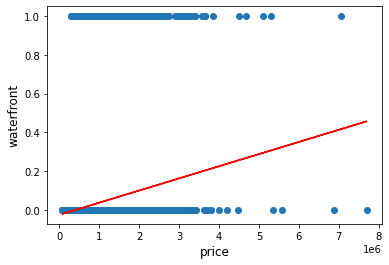

In [258]:
# Make a linear regression instance
lr = LinearRegression()

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(X,y)

# Get Predictions for original x values
# This is not how we will do it for the rest of the course.
predictions = lr.predict(X)

plt.scatter(df['price'], df['waterfront'])
plt.plot(df['price'], predictions, color='red')


plt.ylabel('waterfront', fontsize = 12)
plt.xlabel('price', fontsize = 12)

In [259]:
X = df['price'].values.reshape(-1,1)
y = df['waterfront']

logreg = LogisticRegression(C = 1000)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg.fit(X,y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 0, 'price')

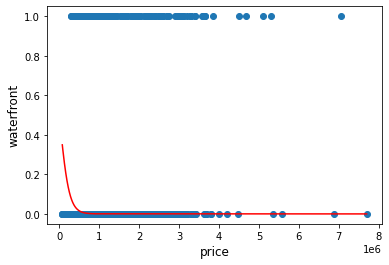

In [260]:
#Looks like this won't work so well for this particular approach
#Model is accurate is predicting house is not on waterfront
example_df = pd.DataFrame(data = {'price': df['price'].values,
                     'waterfront': df['waterfront'].values})

example_df['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X))[1]
example_df = example_df.sort_values(['logistic_preds'])

plt.scatter(example_df['price'], example_df['waterfront'])
plt.plot(example_df['price'], example_df['logistic_preds'].values, color='red')

plt.ylabel('waterfront', fontsize = 12)
plt.xlabel('price', fontsize = 12)

In [261]:
score = logreg.score(X, y)
print(score)

0.9924582427242863


In [0]:
cm = metrics.confusion_matrix(y, logreg.predict(X))

(2.5, -0.5)

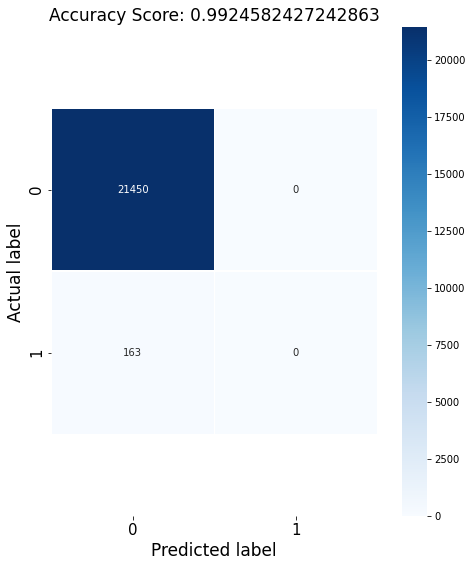

In [263]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [264]:
true_pos = cm[1,1]
false_pos = cm[0,1]
true_neg = cm[0,0]
false_neg = cm[1,0]

# Calculate Sensitivity, specificity
sensitivity = true_pos / (true_pos + false_neg)
specificity = true_neg / (true_neg + false_pos)

print('Sensitivity: {:.3f}'.format(sensitivity))
print('Specificity: {:.3f}'.format(specificity))

Sensitivity: 0.000
Specificity: 1.000


In [265]:
type_one_error = 1 - specificity
type_two_error = 1 - sensitivity
print('Type 1 Error Rate: {:.3f}'.format(type_one_error))
print('Type 2 Error Rate: {:.3f}'.format(type_two_error))

Type 1 Error Rate: 0.000
Type 2 Error Rate: 1.000


Type I Error rate is the proportion of instances which are incorrectly classified as positive cases (relative to the total number of negative cases). It is calculated as  1−𝑠𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦 , or simply the false positives relative to the total non-cases in the data,  𝐹𝑃/𝑁 .

Type II Error rate is the proportion of instances which are incorrectly classified as negative cases (relative to the total number of positive cases). It is calculated as  1−𝑠𝑒𝑛𝑠𝑖𝑡𝑖𝑣𝑖𝑡𝑦 , or simply the false negatives relative to the total cases in the data,  𝐹𝑁/𝑃 .

####ROC Curve


In [0]:
# Generate data for the ROC curve using the `metrics.roc_curve` function
fpr, tpr, thresholds  = metrics.roc_curve(example_df['waterfront'], example_df['logistic_preds'])

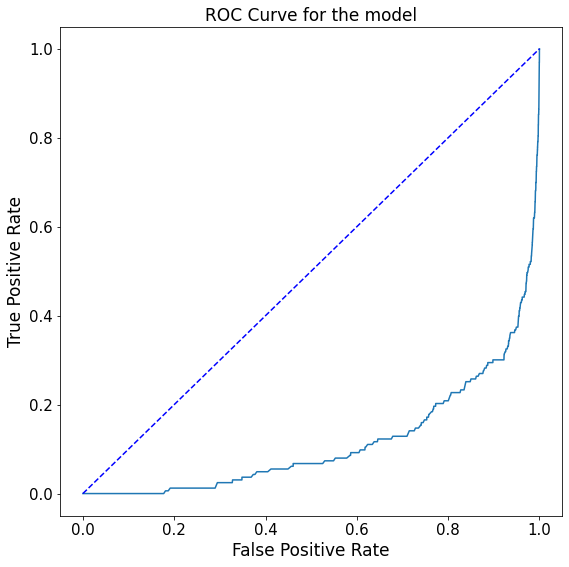

In [267]:
# Draw your ROC curve
plt.figure(figsize=(9,9))
plt.title("ROC Curve for the model", fontsize = 17)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'b--')
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.tick_params(labelsize= 15)

####Logistic Regresison II

In [0]:
X = df.loc[:, ['bedrooms',
               'bathrooms',
               'sqft_living',
               'sqft_lot',
               'floors', 
               'price', 
               'view', 
               'condition', 
               'grade', 
               'sqft_above', 
               'sqft_basement', 
               'yr_built',
               'zipcode',
               'yr_renovated', 
               'lat',
               'long',
               'sqft_living15',
               'sqft_lot15']]


y = df.loc[:, 'waterfront'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)

In [0]:
#Standardize the data!
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
logreg = LogisticRegression()

In [274]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
# Returns a NumPy Array
# Predict for One Observation (image)
logreg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
# class predictions (not predicted probabilities)
predictions = logreg.predict(X_test)

In [0]:
# calculate classification accuracy
score = logreg.score(X_test, y_test)

In [280]:
score

0.9964840858623242

In [281]:
#y_test.value_counts()

AttributeError: ignored

In [0]:
cm = metrics.confusion_matrix(y_test, predictions)

(2.5, -0.5)

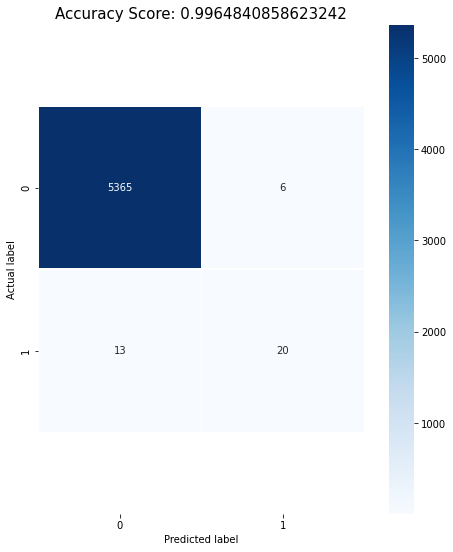

In [283]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

####Making a Regression Tree for Price


In [247]:
#guess the useful variables to include
X = df.loc[:, ['bedrooms',
               'bathrooms',
               'sqft_living',
               'sqft_lot',
               'floors', 
               'waterfront', 
               'view', 
               'condition', 
               'grade', 
               'sqft_above', 
               'sqft_basement', 
               'yr_built',
               'zipcode',
               'yr_renovated', 
               'lat',
               'long',
               'sqft_living15',
               'sqft_lot15']]



y = df.loc[:, 'price'].values

# test_size: what proportion of original data is used for test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()

lin_reg.fit(X_train, Y_train)
dt_reg.fit(X_train, Y_train)

lin_reg_score = lin_reg.score(X_test, Y_test)
dt_reg_score = dt_reg.score(X_test, Y_test)
print(lin_reg_score)
print(dt_reg_score)


0.6900932169857936
0.742261219088259


####TrainTestSplit (Decision Tree Classifier for Zipcode)


In [0]:
#guess the useful variables to include
X = df[['bedrooms',
        'bathrooms',
        'sqft_living',
        'sqft_lot',
        'floors', 
        'price', 
        'view', 
        'condition', 
        'grade', 
        'sqft_above', 
        'sqft_basement', 
        'yr_built', 
        'yr_renovated',
        'waterfront', 
        'lat',
        'long',
        'sqft_living15',
        'sqft_lot15']].values

In [152]:
X.shape

(21613, 18)

In [0]:
y = df['zipcode'].values

In [0]:
y = y.reshape(-1,1)

In [155]:
y.shape

(21613, 1)

In [0]:
#Training and testing on the entire dataset, don't do this

# Import the model you want to use
#up top, from sklearn.tree import DecisionTreeClassifier

# Make an instance of the model
clf = DecisionTreeClassifier(max_depth = 5, 
                             random_state = 0)

# Train the model on the data
clf.fit(X, y)

# class predictions 
predictions = clf.predict(X)

In [157]:
# calculate classification accuracy
score = clf.score(X, y)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.5001619395734049


In [0]:
# already imported from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    test_size =.20)

In [160]:
# Original features matrix
X.shape

(21613, 18)

In [161]:
# Original target vector
y.shape

(21613, 1)

In [162]:
X_train.shape

(17290, 18)

In [163]:
X_test.shape

(4323, 18)

In [164]:
y_train.shape

(17290, 1)

In [165]:
y_test.shape

(4323, 1)

In [0]:
# Import the model you want to use
# We already did this at top of page, but repeating in case you wonder where this code comes from
#from sklearn.tree import DecisionTreeClassifier

# Make an instance of the model
clf = DecisionTreeClassifier(max_depth = 10, 
                             random_state = 0)



# Train the model on the training data
clf.fit(X_train, y_train)

# class predictions for the test set
predictions = clf.predict(X_test)

In [173]:
# calculate classification accuracy
#accuracy more than cut in half with train-test split
score = clf.score(X_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9706222530650012


####Decision Tree For Bedrooms

In [0]:
#Arrange data into features matrix and target vector
feature_cols = [#'bathrooms',
                #'sqft_living',
                #'sqft_lot',
                #'floors', 
                'price', 
                #'sqft_above', 
                #'sqft_basement', 
                'yr_built', 
                'yr_renovated', 
                'lat',
                'long',
                #'sqft_living15',
                #'sqft_lot15'
                ]


In [0]:
#Create X and y
X = df.loc[:, feature_cols]
y = df['bedrooms']

In [0]:
#Split data into training and test data 
#already imported from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)

In [0]:
#Make an instance of the model (it's been imported a the top)
clf = DecisionTreeClassifier(max_depth = 5)

In [214]:
#Train the model on the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [215]:
#Predict labels of new data
# Returns a NumPy Array
# Predict for One Observation (image)
clf.predict(X_test)

array([3, 4, 2, ..., 4, 3, 3])

In [0]:
#Make predictions on testing set and calculate accuracy
# class predictions (not predicted probabilities)
predictions = clf.predict(X_test)

In [217]:
# calculate classification accuracy
score = clf.score(X_test, y_test)
score

0.5390451517394522

In [218]:
y_test.value_counts()

3     2474
4     1812
2      638
5      353
6       61
1       47
7        9
8        5
0        3
10       1
9        1
Name: bedrooms, dtype: int64

In [219]:
#Seems to be slightly better than null accuracy :)
2474/(2474+1812+638+353+61+47+9+5+3+1+9)

0.45713229859571325

In [0]:
#Making a confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

(11.5, -0.5)

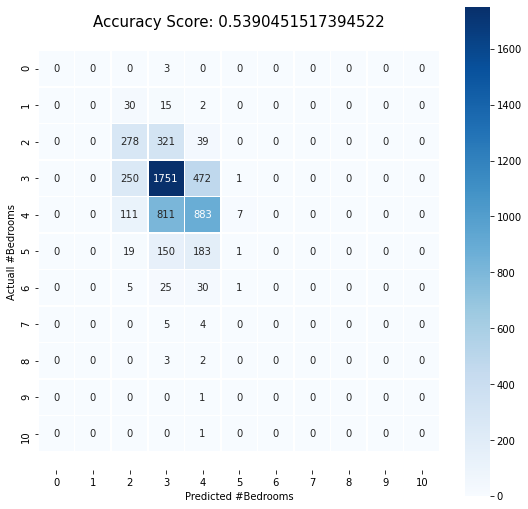

In [221]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actuall #Bedrooms');
plt.xlabel('Predicted #Bedrooms');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [222]:
#Looking at feature importance 
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
price,0.399
yr_built,0.380
lat,0.141
long,0.080
yr_renovated,0.000


####K-Folds Cross Validation

In [0]:
# Making ths process similar to the image in the previous section
kf = KFold(n_splits=5, shuffle=False)

In [176]:
accuracy_list = []
n= 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    clf = DecisionTreeClassifier().fit(X[train_index], y[train_index])
    score = clf.score(X[test_index], y[test_index])

    accuracy_list.append(score)
    print('Model: ', n+1)
    print('Accuracy: ', accuracy_list[n])
    n = n + 1

~~~~ CROSS VALIDATION each fold ~~~~
Model:  1
Accuracy:  0.9694656488549618
Model:  2
Accuracy:  0.9703909322229933
Model:  3
Accuracy:  0.9754799907471663
Model:  4
Accuracy:  0.9706154558074965
Model:  5
Accuracy:  0.939379916705229


In [177]:
print('Mean of Accuracy for all folds:', np.mean(accuracy_list))

Mean of Accuracy for all folds: 0.9650663888675695


####Shorter way of doing K-folds cross validation

In [178]:
clf = DecisionTreeClassifier()

# cross-validatation using a method (very similar to what we did in the code above)
cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

0.9648351215472741